## 1. Install Beberapa Library Terlebih Dahulu

In [70]:
# Install library nltk (natural language tool-kit)
!pip install nltk

In [71]:
# Install library WordCloud. Library ini untuk membuat visualisasi kumpulan-kumpulan teks
!pip install WordCloud

In [72]:
"""
Install library regex. Library ini bertujuan untuk mengubah bentuk
string dan bisa menghilangkan/membersihkan teks dari simbol-simbol, emoticon, dll
"""
!pip install regex

In [73]:
"""
Install library Sastrawi. 
Library ini bertujuan untuk mengubah kata-kata yang memiliki imbuhan bahasa Indonesia menjadi bentuk dasarnya
"""
!pip install Sastrawi

In [74]:
"""
Install library swifter. Library ini berfungsi untuk mempercepat proses stemming
terhadap DataFrame ketika menjalankan pemrosesan secara parallel
"""
!pip install swifter

## 2. Import Library dan Eksplorasi Dataset Menggunakan Pandas

In [75]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import re
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekapr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
# Read dataset yang telah dicrawling (diambil) dari media sosial twitter dan menampilkan data sebanyak 17 data teratas
data_hepatitis = pd.read_csv("Data Crawling Hepatitis Akut/Tweet_Hepatitis_with_Label_TextBlob.csv")

data_hepatitis.head(17)

,Waktu Tweet,Username,Tweet,Sentimen
0,2022-06-26 16:16:08,⚕️base anak fk | open dm📩,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral
1,2022-06-26 14:02:24,billion store id,terbaik teraman supplement kesehatan kapsul sp...,Positive
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive
5,2022-06-26 11:20:51,syaza 🇲🇾,ambil ujian darah doktor kata darah semua cant...,Positive
6,2022-06-26 11:17:15,jengkelin say no 🚫💉,vaksin gak pernah salah jadi katakan saja itu ...,Positive
7,2022-06-26 11:08:07,rs pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive
8,2022-06-26 11:07:32,🦋,mulan hepatitis gunung,Neutral
9,2022-06-26 11:05:22,nawa,byeeee semua bye gue udah stres minggu sama ke...,Neutral


In [77]:
# Melihat ukuran seperti jumlah kolom dan baris dari DataFrame "data_hepatitis"
data_hepatitis.shape

(899, 4)

In [78]:
# Melihat tipe data dari DataFrame "data_hepatitis"
data_hepatitis.dtypes

Waktu Tweet    object
Username       object
Tweet          object
Sentimen       object
dtype: object

In [79]:
# Melihat apakah di dalam DataFrame "data_hepatitis" memiliki missing values/tidak
data_hepatitis.isna()

,Waktu Tweet,Username,Tweet,Sentimen
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
894,False,False,False,False
895,False,False,False,False
896,False,False,False,False
897,False,False,False,False


In [80]:
# Melihat informasi yang terkandung di dalam DataFrame "data_hepatitis"
data_hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Waktu Tweet  899 non-null    object
 1   Username     899 non-null    object
 2   Tweet        899 non-null    object
 3   Sentimen     899 non-null    object
dtypes: object(4)
memory usage: 28.2+ KB


Berdasarkan output dari informasi yang ada di dalam "data_hepatitis" maka dapat diambil beberapa kesimpulan diantaranya adalah sebagai berikut:

1. Jumlah baris yang ada di dalam DataFrame "data_hepatitis" yakni sebanyak 899 data dengan 4 kolom.
2. Setiap kolom yang ada di dalam DataFrame "data_hepatitis" tidak memiliki missing values/nilai kosong.
3. Tipe data yang digunakan pada DataFrame "data_hepatitis" hanya object (string) saja.

In [81]:
"""
Melihat jumlah nilai sekaligus data-data apa saja yang ada 
di dalam kolom "Waktu Tweet", "Username", dan "Sentimen"
"""

print("--------------Jumlah Total Nilai Data Pada Kolom Waktu Tweet--------------")
print(data_hepatitis["Waktu Tweet"].value_counts(), "\n")

print("--------------Jumlah Total Nilai Data Pada Kolom Username--------------")
print(data_hepatitis["Username"].value_counts(), "\n")

print("--------------Jumlah Total Nilai Data Pada Kolom Sentimen--------------")
print(data_hepatitis["Sentimen"].value_counts())

--------------Jumlah Total Nilai Data Pada Kolom Waktu Tweet--------------
2022-06-19 05:55:41    2
2022-06-19 11:42:28    2
2022-06-19 11:42:29    2
2022-06-22 07:20:48    2
2022-06-24 02:05:59    2
                      ..
2022-06-24 02:28:17    1
2022-06-24 02:27:38    1
2022-06-24 02:26:50    1
2022-06-24 02:22:18    1
2022-06-17 01:45:06    1
Name: Waktu Tweet, Length: 894, dtype: int64 

--------------Jumlah Total Nilai Data Pada Kolom Username--------------
anissa billa                           14
yuni marisa                            10
sutansegeh                             10
putri                                  10
luis chaniago                           9
                                       ..
goodman                                 1
epidemiology job openings (epijobs)     1
mune 🌙                                  1
kalla jengking                          1
sunday🌏                                 1
Name: Username, Length: 514, dtype: int64 

--------------Jumlah Tota

Berdasarkan hasil output diatas maka dapat diambil contoh penjelasan dari dua kolom (Username dan Sentimen) yang diantaranya adalah sebagai berikut:


1. Pada kolom "Username", nilai yang sering muncul di dalam DataFrame "data_hepatitis" adalah username yang bernama annisa billa dengan nilai kemunculan sebanyak 14 kali yang kemudian disusul dengan username yang bernama yuni marisa yang memiliki nilai kemunculan sebanyak 10 kali, sedangkan username yang jarang terlihat pada DataFrame "data" adalah goodman, epidemiology job openings (epijobs), mune 🌙, kalla jengking, dan sunday🌏 yang memiliki nilai kemunculan hanya sebanyak satu kali saja dalam meng-tweet topik tentang hepatitis akut.
2. Pada kolom "Sentimen", nilai yang sering muncul di dalam kolom ini yaitu sentimen Positive dengan nilai kemunculan sebanyak 558 kali yang kemudian disusul oleh sentimen Neutral (Netral) sebanyak 243 kali, sedangkan sentimen Negative (Negatif) memiliki total nilai kemunculan sebanyak 98 kali di dalam DataFrame "data_hepatitis".

In [82]:
# Melihat nilai statistik deskriptif dari DataFrame "data_hepatitis" untuk semua kolom
data_hepatitis.describe(include="all")

,Waktu Tweet,Username,Tweet,Sentimen
count,899,899,899,899
unique,894,514,899,3
top,2022-06-19 05:55:41,anissa billa,dok mau tanyaaa kalo misalnya tes hepatitis se...,Positive
freq,2,14,1,558


Berdasarkan hasil diatas dapat diketahui nilai-nilai statistik deskriptif dari keempat kolom pada DataFrame "data_hepatitis". Di samping itu, karena keempat kolom ini bersifat kategorik bukan numerik maka nilai statistik deskriptif yang ditampilkan berbeda daripada nilai statistik deskriptif untuk kolom yang bersifat numerik karena nilai statistik deskriptif untuk kolom yang bersifat numerik adalah mean, std (standard deviasi), quartil 1 (25%), quartil 2/median (50%), quartil 3 (75%), min (minimum), dan max (maximum), sedangkan untuk kolom kategorik memiliki nilai statistik deskriptif yaitu nilai unique, top, dan freq.

Nilai unique merupakan total nilai/data yang berbeda di dalam 1 kolom. Nilai top merupakan nilai yang sering muncul di dalam kolom tersebut. Terakhir adalah nilai freq yang merupakan total nilai pada nilai top. Sebagai contoh nilai top pada kolom "Sentimen" adalah Positive yang memiliki total kemunculan di dalam kolom tersebut sebanyak 558 data. Hal tersebut sama seperti di codingan sebelumnya ketika saya ingin melihat jumlah nilai dari masing-masing kolom di dalam DataFrame "data_hepatitis". Berikut adalah penjelasan untuk masing-masing nilai statistik deskriptif dari kolom Waktu Tweet, Username, dan Sentimen berdasarkan hasil statistik deskriptif diatas:


1. Pada kolom "Waktu Tweet" memiliki nilai unique berjumlah 894 dengan nilai top/nilai yang sering terlihat adalah 2022-06-19 05:55:41 dengan nilai freq atau nilai kemunculan sebanyak 2 kali.
2. Kolom "Username" memiliki nilai top adalah anissa billa dengan jumlah nilai kemunculan sebanyak 14 kali. Selain itu, kolom "Username" memiliki 514 nilai data yang berbeda-beda.
3. Terakhir adalah kolom "Sentimen" yang memiliki nilai unique hanya 3 saja dan dari ketiga nilai tersebut terdapat nilai top/nilai yang sering muncul di dalam kolom "Sentimen" adalah sentimen Positive yang memiliki total nilai kemunculan (nilai freq) sebanyak 558 kali.

## 3. Text Preprocessing

### 3.1. Cleansing Text

Text preprocessing pertama yang saya lakukan yaitu membersihkan isi tweet yang memiliki simbol-simbol seperti !”#$%&’()*+,-./:;<=>?@[]^_`{|}~]

In [83]:
"""
Menghilangkan huruf-huruf yang tidak sesuai, simbol-simbol, dan emoticon yang tidak dibutuhkan 
di dalam kolom "Username" dan "Tweet" dan menampilkan data sebanyak 15 data teratas
"""
def cleansing_text(text):
    text = re.sub(r"[^a-zA-z0-9]", " ", str(text))
    text = re.sub(r"\b\w{1,2}\b", "", text)
    text = re.sub(r"\s\s+", " ", text)
    text = re.sub(r"https?:\/\/\S+", "", text)  
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    return text

data_hepatitis["Username"] = data_hepatitis["Username"].apply(cleansing_text)
data_hepatitis["Tweet"] = data_hepatitis["Tweet"].apply(cleansing_text)

data_hepatitis.head(15)

,Waktu Tweet,Username,Tweet,Sentimen
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive
5,2022-06-26 11:20:51,syaza,ambil ujian darah doktor kata darah semua cant...,Positive
6,2022-06-26 11:17:15,jengkelin say,vaksin gak pernah salah jadi katakan saja itu ...,Positive
7,2022-06-26 11:08:07,pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive
8,2022-06-26 11:07:32,,mulan hepatitis gunung,Neutral
9,2022-06-26 11:05:22,nawa,byeeee semua bye gue udah stres minggu sama ke...,Neutral


Setelah melakukan proses pembersihan tweet terhadap simbol-simbol atau karakter-karakter yang tidak dipentingkan, langkah selanjutnya adalah case folding. Case folding merupakan sebuah tahapan untuk mengubah huruf-huruf kapital menjadi huruf-huruf kecil seperti dari huruf "A - Z" menjadi "a - z".

### 3.2. Case Folding

In [84]:
# Mengubah ukuran setiap kalimat yang ada di kolom "Tweet" menjadi huruf kecil dan menampilkan data sebanyak 7 data terbawah
data_hepatitis["Tweet Case Folding"] = data_hepatitis["Tweet"].str.lower()

data_hepatitis.tail(7)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding
892,2022-06-17 02:14:14,hermionne,ikn sejahterakan negeri waspada disinformasi d...,Neutral,ikn sejahterakan negeri waspada disinformasi d...
893,2022-06-17 02:12:54,anisa cenceni,disinformasi vaksin mrna menyebabkan hepatiti...,Neutral,disinformasi vaksin mrna menyebabkan hepatiti...
894,2022-06-17 02:12:14,suparman,tidak benar jika vaksin menyebabkan hepatitis ...,Negative,tidak benar jika vaksin menyebabkan hepatitis ...
895,2022-06-17 02:09:13,snow white,vaksin astrazeneca bukan pemicu hepatitis akut...,Positive,vaksin astrazeneca bukan pemicu hepatitis akut...
896,2022-06-17 02:03:05,dindu nuffin,kandungan adenovirus pada vaksin covid bukan p...,Neutral,kandungan adenovirus pada vaksin covid bukan p...
897,2022-06-17 02:00:00,duah menaria,vaksin covid anak aman waspada provokasi kelom...,Positive,vaksin covid anak aman waspada provokasi kelom...
898,2022-06-17 01:45:06,sunday,sini konten nct datang aja barengan gue gak ta...,Positive,sini konten nct datang aja barengan gue gak ta...


Setelah melakukan proses case folding, langkah selanjutnya adalah tokenizing/tokenisasi. Tahap tokenizing merupakan tahap pemotongan teks ke dalam satuan kata atau bisa dikatakan memotong susunan kalimat menjadi kata per kata atau potongan-potongan kata yang akan dianalisis.

### 3.3. Tokenizing

In [85]:
"""
Melakukan tahap tokenizing atau tokenisasi. Tokenizing merupakan tahapan text preprocessing 
yang digunakan untuk memecah atau memotong susunan kalimat menjadi kata per kata dari kolom Tweet Case Folding
dan menampilkan data sebanyak 8 data teratas
"""
def tokenizing(text):
    return word_tokenize(text)

data_hepatitis["Tweet Tokenizing"] = data_hepatitis["Tweet Case Folding"].apply(tokenizing)
data_hepatitis.head(8)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral,dok mau tanyaaa kalo misalnya tes hepatitis se...,"[dok, mau, tanyaaa, kalo, misalnya, tes, hepat..."
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps..."
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml..."
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral,puan yang menyoroti hepatitis dan berbagai mac...,"[puan, yang, menyoroti, hepatitis, dan, berbag..."
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive,puan menyoroti kasus hepatitis akut anak harga...,"[puan, menyoroti, kasus, hepatitis, akut, anak..."
5,2022-06-26 11:20:51,syaza,ambil ujian darah doktor kata darah semua cant...,Positive,ambil ujian darah doktor kata darah semua cant...,"[ambil, ujian, darah, doktor, kata, darah, sem..."
6,2022-06-26 11:17:15,jengkelin say,vaksin gak pernah salah jadi katakan saja itu ...,Positive,vaksin gak pernah salah jadi katakan saja itu ...,"[vaksin, gak, pernah, salah, jadi, katakan, sa..."
7,2022-06-26 11:08:07,pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive,sempat ramai beberapa waktu lalu hepatitis mis...,"[sempat, ramai, beberapa, waktu, lalu, hepatit..."


Setelah melakukan tahapan tokenisasi (tokenizing), selanjutnya saya akan melakukan proses filtering (stowords). Proses stopwords ini merupakan tahapan pengambilan kata-kata dari tahapan tokenisasi. Stopword merupakan sebuah tahapan yang dimana bertujuan untuk membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

Kata-kata yang termasuk ke dalam list stopwords Bahasa Indonesia adalah sebagai berikut:

"yang", "untuk", "pada", "ke", "para", "namun", "menurut", "antara", "dia", "dua", "ia", "seperti", "jika", "jika", "sehingga", "kembali", "dan", "tidak", "ini", "karena", "kepada", "oleh", "saat", "harus", "sementara", "setelah", "belum", "kami", "sekitar", "bagi", "serta", "di", "dari", "telah", "sebagai", "masih", "hal", "ketika", "adalah", "itu", "dalam", "bisa", "bahwa", "atau", "hanya", "kita", "dengan", "akan", "juga", "ada", "mereka", "sudah", "saya", "terhadap", "secara", "agar", "lain", "anda", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada", "itulah", "lagi", "maka", "tentang", "demi", "dimana", "kemana", "pula", "sambil", "sebelum", "sesudah", "supaya", "guna", "kah", "pun", "sampai", "sedangkan", "selagi", "sementara", "tetapi", "apakah", "kecuali", "sebab", "selain", "seolah", "seraya", "seterusnya", "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "dll", "dahulu", "dulunya", "anu", "demikian", "tapi", "ingin", "juga", "nggak", "mari", "nanti", "melainkan", "oh", "ok", "seharusnya", "sebetulnya", "setiap", "setidaknya", "sesuatu", "pasti", "saja", "toh", "ya", "walau", "tolong", "tentu", "amat", "apalagi", dan "bagaimanapun".

Kata-kata tersebut dapat dilihat atau diketahui melalui library Sastrawi. Tahapan dari stopwords dapat dilihat pada langkah selanjutnya.

### 3.4. Stopwords

In [86]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

Berdasarkan output diatas dapat diketahui bahwasanya Bahasa Indonesia memiliki banyak sekali kata imbuhan seperti kata "yang", "untuk", "pada", dst. Dalam pengujian natural language processing (NLP) biasanya tidak terlalu membutuhkan kata-kata imbuhan. Maka dari itu sebelum melakukan proses pengklasifikasian dengan model machine learning, terlebih dahulu text yang memiliki kata-kata imbuhan dihapus dari daftar teks.

In [87]:
# Melakukan tahap stopwords yaitu menghapus kata-kata imbuhan dari kolom "Tweet Tokenizing"
from nltk.corpus import stopwords
nltk.download("stopwords")

# Mendeklarasikan kata-kata imbuhan Bahasa Indonesia yang akan dihapus
remove_affixes = ["yang", "untuk", "pada", "ke", "para", "namun", "menurut", "antara", "dia", "dua", "ia",
                  "seperti", "jika", "jika", "sehingga", "kembali", "dan", "tidak", "ini", "karena", "kepada", "oleh",
                  "saat", "harus", "sementara", "setelah", "belum", "kami", "sekitar", "bagi", "serta", "di", "dari", "telah",
                  "sebagai", "masih", "hal", "ketika", "adalah", "itu", "dalam", "bisa", "bahwa", "atau", "hanya", "kita",
                  "dengan", "akan", "juga", "ada", "mereka", "sudah", "saya", "terhadap", "secara", "agar", "lain", "anda",
                  "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada", "itulah", "lagi", "maka", "tentang", "demi",
                  "dimana", "kemana", "pula", "sambil", "sebelum", "sesudah", "supaya", "guna", "kah", "pun", "sampai",
                  "sedangkan", "selagi", "sementara", "tetapi", "apakah", "kecuali", "sebab", "selain", "seolah", "seraya",
                  "seterusnya", "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "dll", "dahulu", "dulunya", "anu", "demikian",
                  "tapi", "ingin", "juga", "nggak", "mari", "nanti", "melainkan", "oh", "ok", "seharusnya", "sebetulnya",
                  "setiap", "setidaknya", "sesuatu", "pasti", "saja", "toh", "ya", "walau", "tolong", "tentu", "amat",
                  "apalagi", "bagaimanapun"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekapr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# Mendeklarasikan fungsi untuk list_stopwords untuk Bahasa Indonesia
def list_stopwords_text(text):
    return [word for word in text if word not in list_stopwords]

data_hepatitis["Tweet Stopwords"] = data_hepatitis["Tweet Tokenizing"].apply(list_stopwords_text)

In [89]:
"""
Mendeklarasikan fungsi untuk untuk menghapus kata-kata yang ada 
di dalam list (list_delete). List_delete menampung kata-kata imbuhan yang telah didefisinikan
untuk dihapus dari daftar teks dan menampilkan data sebanyak 8 data terbawah
"""
def stopwords_text(text):
    return [word for word in text if word not in remove_affixes]

data_hepatitis["Tweet Stopwords"] = data_hepatitis["Tweet Stopwords"].apply(stopwords_text)
data_hepatitis.tail(8)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords
891,2022-06-17 02:16:51,ujang frusciante,ikn sejahterakan negeri waspada informasi hoax...,Neutral,ikn sejahterakan negeri waspada informasi hoax...,"[ikn, sejahterakan, negeri, waspada, informasi...","[ikn, sejahterakan, negeri, waspada, informasi..."
892,2022-06-17 02:14:14,hermionne,ikn sejahterakan negeri waspada disinformasi d...,Neutral,ikn sejahterakan negeri waspada disinformasi d...,"[ikn, sejahterakan, negeri, waspada, disinform...","[ikn, sejahterakan, negeri, waspada, disinform..."
893,2022-06-17 02:12:54,anisa cenceni,disinformasi vaksin mrna menyebabkan hepatiti...,Neutral,disinformasi vaksin mrna menyebabkan hepatiti...,"[disinformasi, vaksin, mrna, menyebabkan, hepa...","[disinformasi, vaksin, mrna, menyebabkan, hepa..."
894,2022-06-17 02:12:14,suparman,tidak benar jika vaksin menyebabkan hepatitis ...,Negative,tidak benar jika vaksin menyebabkan hepatitis ...,"[tidak, benar, jika, vaksin, menyebabkan, hepa...","[vaksin, menyebabkan, hepatitis, anak, vaksina..."
895,2022-06-17 02:09:13,snow white,vaksin astrazeneca bukan pemicu hepatitis akut...,Positive,vaksin astrazeneca bukan pemicu hepatitis akut...,"[vaksin, astrazeneca, bukan, pemicu, hepatitis...","[vaksin, astrazeneca, pemicu, hepatitis, akut,..."
896,2022-06-17 02:03:05,dindu nuffin,kandungan adenovirus pada vaksin covid bukan p...,Neutral,kandungan adenovirus pada vaksin covid bukan p...,"[kandungan, adenovirus, pada, vaksin, covid, b...","[kandungan, adenovirus, vaksin, covid, penyeba..."
897,2022-06-17 02:00:00,duah menaria,vaksin covid anak aman waspada provokasi kelom...,Positive,vaksin covid anak aman waspada provokasi kelom...,"[vaksin, covid, anak, aman, waspada, provokasi...","[vaksin, covid, anak, aman, waspada, provokasi..."
898,2022-06-17 01:45:06,sunday,sini konten nct datang aja barengan gue gak ta...,Positive,sini konten nct datang aja barengan gue gak ta...,"[sini, konten, nct, datang, aja, barengan, gue...","[konten, nct, aja, barengan, gue, gak, takutt,..."


Tahapan selanjutnya dalam text processing adalah proses normalisasi. Teknik normalisasi merupakan sebuah tahapan kegiatan text preprocessing untuk mengubah kata-kata yang tidak baku atau kata yang ditulis dengan bahasa "gaul" atau bahasa sehari-hari menjadi kata baku.

### 3.5. Normalisasi

In [90]:
"""
Melakukan perubahan kalimat dasar dari bahasa selain bahasa indonesia menjadi
bahasa indonesia yang baku dengan proses normalisasi. Teknik normalisasi merupakan sebuah teknik untuk mengubah
kata-kata "gaul" atau kata-kata yang tidak baku menjadi sebuah kata yang tepat dan menampilkan data sebanyak 19 data terbawah
"""
normalize_words = {"tanyaaa": "tanya",
                   "kenapaa": "kenapa",
                   "suplemenkesehatan": "suplemen kesehatan",
                   "obatherbal": "obat herbal",
                   "cholestrol": "kolesterol",
                   "aware": "peduli",
                   "byeeee": "bye",
                   "magh": "maag",
                   "mmg": "memang",
                   "anak2": "anak-anak",
                   "rilissehat": "rilis sehat",
                   "pelayana": "pelayanan",
                   "gaada": "tidak ada",
                   "atlit2":"atlit-atlit",
                   "kalo": "kalau",
                   "kaitanny": "kaitannya",
                   "sampe": "sampe",
                   "indonesiawaspada": "indonesia waspada",
                   "yaaaa": "ya", 
                   "indonesiawaspada": "indonesia waspada",
                   "antijamur": "anti jamur",
                   "lu": "lu",
                   "bbrp": "beberapa",
                   "lengkapivaksinperketatprokes": "lengkapi vaksin perketat prokes",
                   "antibakteri": "anti bakteri"
                  }

def word_normalization(document):
    return [normalize_words[term] if term in normalize_words else term for term in document]

data_hepatitis["Tweet Normalisasi"] = data_hepatitis["Tweet Stopwords"].apply(word_normalization)
data_hepatitis.tail(19)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi
880,2022-06-17 02:49:29,doli siagian,waspada provokasi kelompok kepentingan yang me...,Positive,waspada provokasi kelompok kepentingan yang me...,"[waspada, provokasi, kelompok, kepentingan, ya...","[waspada, provokasi, kelompok, kepentingan, me...","[waspada, provokasi, kelompok, kepentingan, me..."
881,2022-06-17 02:48:55,ayam jago,penyebab munculnya hepatitis misterius bukan ...,Neutral,penyebab munculnya hepatitis misterius bukan ...,"[penyebab, munculnya, hepatitis, misterius, bu...","[penyebab, munculnya, hepatitis, misterius, va...","[penyebab, munculnya, hepatitis, misterius, va..."
882,2022-06-17 02:47:29,nadya rahmaaa,vaksinasi covid tidak menyebabkan kasus hepati...,Positive,vaksinasi covid tidak menyebabkan kasus hepati...,"[vaksinasi, covid, tidak, menyebabkan, kasus, ...","[vaksinasi, covid, menyebabkan, hepatitis, aku...","[vaksinasi, covid, menyebabkan, hepatitis, aku..."
883,2022-06-17 02:47:18,erie,waspada hoax vaksinasi covid tak terkait denga...,Positive,waspada hoax vaksinasi covid tak terkait denga...,"[waspada, hoax, vaksinasi, covid, tak, terkait...","[waspada, hoax, vaksinasi, covid, terkait, hep...","[waspada, hoax, vaksinasi, covid, terkait, hep..."
884,2022-06-17 02:45:22,kelurahan garuda,giat seklur garuda mengikuti kegiatan sosialis...,Positive,giat seklur garuda mengikuti kegiatan sosialis...,"[giat, seklur, garuda, mengikuti, kegiatan, so...","[giat, seklur, garuda, mengikuti, kegiatan, so...","[giat, seklur, garuda, mengikuti, kegiatan, so..."
885,2022-06-17 02:42:00,lalalanina55,adenovirus vaksin astrazeneca picu hepatitis a...,Positive,adenovirus vaksin astrazeneca picu hepatitis a...,"[adenovirus, vaksin, astrazeneca, picu, hepati...","[adenovirus, vaksin, astrazeneca, picu, hepati...","[adenovirus, vaksin, astrazeneca, picu, hepati..."
886,2022-06-17 02:41:45,narasi indonesia,vaksinasi covid tidak sebabkan hepatitis akut ...,Positive,vaksinasi covid tidak sebabkan hepatitis akut ...,"[vaksinasi, covid, tidak, sebabkan, hepatitis,...","[vaksinasi, covid, sebabkan, hepatitis, akut, ...","[vaksinasi, covid, sebabkan, hepatitis, akut, ..."
887,2022-06-17 02:30:37,humas polreslahat,maraknya penyakit hepatitis yang menyerang ana...,Positive,maraknya penyakit hepatitis yang menyerang ana...,"[maraknya, penyakit, hepatitis, yang, menyeran...","[maraknya, penyakit, hepatitis, menyerang, ana...","[maraknya, penyakit, hepatitis, menyerang, ana..."
888,2022-06-17 02:25:25,amoi kurau,waspada hoax tidak ada korelasi antara hepatit...,Neutral,waspada hoax tidak ada korelasi antara hepatit...,"[waspada, hoax, tidak, ada, korelasi, antara, ...","[waspada, hoax, korelasi, hepatitis, vaksin, k...","[waspada, hoax, korelasi, hepatitis, vaksin, k..."
889,2022-06-17 02:20:10,elina azkia,awas hoax adenovirus divaksinasi astrazeneca b...,Positive,awas hoax adenovirus divaksinasi astrazeneca b...,"[awas, hoax, adenovirus, divaksinasi, astrazen...","[awas, hoax, adenovirus, divaksinasi, astrazen...","[awas, hoax, adenovirus, divaksinasi, astrazen..."


Tahapan terakhir dalam text processing adalah proses stemming. Teknik stemming merupakan sebuah tahapan kegiatan text preprocessing untuk membentuk sebuah kata baru dengan menambahkan kata imbuhan terhadap suatu kata yang tidak mengubah kelas kata tersebut. Teknik stemming juga dapat dikatakan sebagai teknik yang mengelompokkan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### 3.6. Stemming

In [91]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "Tweet Normalisasi"
for document in data_hepatitis["Tweet Normalisasi"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_words(document):
    return [term_dict[text] for text in document]

data_hepatitis["Tweet Stemming"] = data_hepatitis["Tweet Normalisasi"].swifter.apply(stemming_words)

2136
------------------------
dok : dok
tanya : tanya
kalau : kalau
tes : tes
hepatitis : hepatitis
sgot : sgot
sgpt : sgpt
ningkat : ningkat
kenapa : kenapa
terbaik : baik
teraman : ram
supplement : supplement
kesehatan : sehat
kapsul : kapsul
spirulina : spirulina
kolesterol : kolesterol
diabetes : diabetes
jantung : jantung
kapsulspirulina : kapsulspirulina
herbalspirulina : herbalspirulina
obat herbal : obat herbal
suplemen kesehatan : suplemen sehat
ketua : ketua
dpr : dpr
puan : puan
maharani : maharani
menyoroti : sorot
perhatian : perhati
khusus : khusus
sidang : sidang
kali : kali
akut : akut
anak : anak
masyarakat : masyarakat
membuktikan : bukti
betapa : betapa
pedulinya : peduli
permasalahan : masalah
tanah : tanah
air : air
harga : harga
pangan : pangan
lebaran : lebaran
pemulihan : pulih
ekonomi : ekonomi
pandemi : pandemi
covid : covid
mereda : reda
ambil : ambil
ujian : uji
darah : darah
doktor : doktor
cantik : cantik
okay : okay
hiv : hiv
negative : negative
lepas : l

dampat : dampat
terprovokasi : provokasi
berita : berita
mata : mata
turun : turun
namanya : nama
pengaruh : pengaruh
leres : les
teu : teu
aya : aya
nyababkeun : nyababkeun
patitis : patitis
geneva : geneva
kes : kes
berkemungkinan : mungkin
teruk : teruk
kanak : kanak
setakat : takat
bener : bener
ora : ora
ana : ana
sing : sing
nyebabake : nyebabake
cerdas : cerdas
menanggapi : tanggap
isu : isu
true : true
there : there
vaccine : vaccine
that : that
causes : causes
bohong : bohong
zaneka : zaneka
korelasi : korelasi
eropa : eropa
menyumbang : sumbang
267 : 267
inggris : inggris
jabar : jabar
wabah : wabah
menulari : tular
ratusan : ratus
sayangnya : sayang
akun : akun
media : media
sosial : sosial
memuat : muat
klaim : klaim
menuduh : tuduh
diduga : duga
pemicunya : picu
diimbau : imbau
jaga : jaga
siasatan : siasat
kajian : kaji
jawapan : jawapan
punca : punca
berlaku : laku
asbab : asbab
peningkatan : tingkat
kanak2 : kanak2
kumulatif : kumulatif
juni : juni
bhdunia : bhdunia
dik

gatau : gatau
konsul : konsul
ngga : ngga
kontak : kontak
dinkes : dinkes
gencar : gencar
sosialisasikan : sosialisasi
bahaya : bahaya
ajakin : ajakin
senior : senior
cuman : cuman
sayang : sayang
riwayat : riwayat
ortu : ortu
alhamdullilah : alhamdullilah
ayah : ayah
terselamatkan : selamat
mcu : mcu
kemaren : kemaren
reaktif : reaktif
banget : banget
abis : abis
sakitan : sakit
dusun : dusun
bgt : bgt
dpt : dpt
hib : hib
ipv : ipv
campak : campak
nek : nek
wes : wes
keno : keno
koe : koe
biso : biso
nge : nge
tweet : tweet
ngene : ngene
meneh : teh
wibungitis : wibungitis
jenis : jenis
goblog : goblog
wkwk : wkwk
amit : amit
measles : measles
mandi : mandi
dlu : dlu
trus : trus
bersih2 : bersih2
deh : deh
tangan : tangan
mainin : mainin
titit : titit
tiati : tiati
wkk : wkk
lumayan : lumayan
mudahan : mudah
penyerahan : serah
btw : btw
terdiagnosa : terdiagnosa
otomatis : otomatis
peran : peran
edukasi : edukasi
karna : karna
tau : tau
kedepannya : depan
terjangkit : jangkit
tubuh : 

meningkatkan : tingkat
penanggulanan : penanggulanan
kab : kab
dibidangi : bidang
bidang : bidang
p2p : p2p
kelas : kelas
gegara : gegara
unggulan : unggul
poin : poin
rank : rank
tenang : tenang
divaksinnya : vaksin
setahun : tahun
beh : beh
nenek : nenek
gara2 : gara2
1944 : 1944
framingnya : framingnya
jelek : jelek
patahin : patahin
wlopun : wlopun
dipake : dipake
nyuci : nyuci
skt : skt
pake : pake
rambut : rambut
terang : terang
ya : ya
basically : basically
bule : bule
undertonenya : undertonenya
cool : cool
wkwkwkwkwk : wkwkwkwkwk
jht : jht
medapat : medapat
srngan : srngan
remaja : remaja
sekarat : sekarat
dlm : dlm
tidur : tidur
atlet : atlet
berolah : olah
raga : raga
kelumpuhan : lumpuh
wajah : wajah
solusi : solusi
tersedia : sedia
adl : adl
melanjutkan : lanjut
perluasan : luas
aktivitas : aktivitas
biologis : biologis
ukraina : ukraina
2017 : 2017
didanai : dana
dtra : dtra
black : black
veatch : veatch
analisis : analisis
tularemia : tularemia
slide : slide
rusia : rusi

nyambung : nyambung
gang : gang
prediksi : prediksi
2021 : 2021
mendadak : dadak
macam2 : macam2
sads : sads
scd : scd
prediktor : prediktor
berbasis : bas
teguh : teguh
bersandar : sandar
quran : quran
meramal : ramal
tambahn : tambahn
teratur : atur
istirahat : istirahat
lembur : lembur
nongki : nongki
stress : stress
tampi : tampi
disna : disna
ekg : ekg
tensi : tensi
rotgen : rotgen
hasilny : hasilny
bagus : bagus
knp : knp
7kg : 7kg
scepat : scepat
you : you
know : know
reason : reason
why : why
never : never
story : story
behind : behind
jawabannya : jawab
point : point
tambahin : tambahin
itseokjinkim : itseokjinkim
ganteng : ganteng
kanser : kanser
utama : utama
seawal : awal
elakkan : elak
kelak : kelak
kpd : kpd
kerana : rana
melawan : lawan
lho : lho
setau : tau
maaf : maaf
belajar : ajar
klw : klw
doang : doang
resep : resep
skrg : skrg
tequilla : tequilla
grgr : grgr
hook : hook
stranger : stranger
anjing : anjing
majalah : majalah
family : family
vol : vol
hadir : hadir
h

Pandas Apply:   0%|          | 0/899 [00:00<?, ?it/s]

In [92]:
# Menampilkan data sebanyak 19 data teratas dari DataFrame "data_hepatitis"
data_hepatitis.head(19)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral,dok mau tanyaaa kalo misalnya tes hepatitis se...,"[dok, mau, tanyaaa, kalo, misalnya, tes, hepat...","[dok, tanyaaa, kalo, tes, hepatitis, sgot, sgp...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt..."
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[baik, ram, supplement, sehat, kapsul, spiruli..."
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, sorot, perhati, k..."
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral,puan yang menyoroti hepatitis dan berbagai mac...,"[puan, yang, menyoroti, hepatitis, dan, berbag...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, sorot, hepatitis, masyarakat, bukti, be..."
4,2022-06-26 12:17:25,lyndsay,puan menyoroti kasus hepatitis akut anak harga...,Positive,puan menyoroti kasus hepatitis akut anak harga...,"[puan, menyoroti, kasus, hepatitis, akut, anak...","[puan, menyoroti, hepatitis, akut, anak, harga...","[puan, menyoroti, hepatitis, akut, anak, harga...","[puan, sorot, hepatitis, akut, anak, harga, pa..."
5,2022-06-26 11:20:51,syaza,ambil ujian darah doktor kata darah semua cant...,Positive,ambil ujian darah doktor kata darah semua cant...,"[ambil, ujian, darah, doktor, kata, darah, sem...","[ambil, ujian, darah, doktor, darah, cantik, c...","[ambil, ujian, darah, doktor, darah, cantik, k...","[ambil, uji, darah, doktor, darah, cantik, kol..."
6,2022-06-26 11:17:15,jengkelin say,vaksin gak pernah salah jadi katakan saja itu ...,Positive,vaksin gak pernah salah jadi katakan saja itu ...,"[vaksin, gak, pernah, salah, jadi, katakan, sa...","[vaksin, gak, salah, misterius, rakyatmelawanm...","[vaksin, gak, salah, misterius, rakyatmelawanm...","[vaksin, gak, salah, misterius, rakyatmelawanm..."
7,2022-06-26 11:08:07,pondok indah,sempat ramai beberapa waktu lalu hepatitis mis...,Positive,sempat ramai beberapa waktu lalu hepatitis mis...,"[sempat, ramai, beberapa, waktu, lalu, hepatit...","[ramai, hepatitis, misterius, penyebabnya, bia...","[ramai, hepatitis, misterius, penyebabnya, bia...","[ramai, hepatitis, misterius, sebab, biar, ped..."
8,2022-06-26 11:07:32,,mulan hepatitis gunung,Neutral,mulan hepatitis gunung,"[mulan, hepatitis, gunung]","[mulan, hepatitis, gunung]","[mulan, hepatitis, gunung]","[mulan, hepatitis, gunung]"
9,2022-06-26 11:05:22,nawa,byeeee semua bye gue udah stres minggu sama ke...,Neutral,byeeee semua bye gue udah stres minggu sama ke...,"[byeeee, semua, bye, gue, udah, stres, minggu,...","[byeeee, bye, gue, udah, stres, minggu, kertas...","[bye, bye, gue, udah, stres, minggu, kertas, k...","[bye, bye, gue, udah, stres, minggu, kertas, k..."


In [93]:
"""
Membuat kolom yang bernama "Teks Bersih" pada DataFrame "data_hepatitis" yang telah selesai dilakukan proses text preprocessing.
Kolom "Teks Bersih" didapatkan dari kolom "Tweet Stemming" dan menghilangkan pembatas ([] dan , pada setiap teksnya)
serta menampilkan data sebanyak 4 data teratas
"""
data_hepatitis["Tweet Bersih"] = [" ".join(map(str, i)) for i in data_hepatitis["Tweet Stemming"]]
data_hepatitis.head(4)

,Waktu Tweet,Username,Tweet,Sentimen,Tweet Case Folding,Tweet Tokenizing,Tweet Stopwords,Tweet Normalisasi,Tweet Stemming,Tweet Bersih
0,2022-06-26 16:16:08,base anak open,dok mau tanyaaa kalo misalnya tes hepatitis se...,Neutral,dok mau tanyaaa kalo misalnya tes hepatitis se...,"[dok, mau, tanyaaa, kalo, misalnya, tes, hepat...","[dok, tanyaaa, kalo, tes, hepatitis, sgot, sgp...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...","[dok, tanya, kalau, tes, hepatitis, sgot, sgpt...",dok tanya kalau tes hepatitis sgot sgpt ningka...
1,2022-06-26 14:02:24,billion store,terbaik teraman supplement kesehatan kapsul sp...,Positive,terbaik teraman supplement kesehatan kapsul sp...,"[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[terbaik, teraman, supplement, kesehatan, kaps...","[baik, ram, supplement, sehat, kapsul, spiruli...",baik ram supplement sehat kapsul spirulina kol...
2,2022-06-26 12:19:45,lyndsay,ketua dpr puan maharani menyoroti sejumlah hal...,Positive,ketua dpr puan maharani menyoroti sejumlah hal...,"[ketua, dpr, puan, maharani, menyoroti, sejuml...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, menyoroti, perhat...","[ketua, dpr, puan, maharani, sorot, perhati, k...",ketua dpr puan maharani sorot perhati khusus d...
3,2022-06-26 12:19:42,lyndsay,puan yang menyoroti hepatitis dan berbagai mac...,Neutral,puan yang menyoroti hepatitis dan berbagai mac...,"[puan, yang, menyoroti, hepatitis, dan, berbag...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, menyoroti, hepatitis, masyarakat, membu...","[puan, sorot, hepatitis, masyarakat, bukti, be...",puan sorot hepatitis masyarakat bukti betapa p...


### 3.7. Mengeluarkan Isi Tweet dari Kolom "Tweet Bersih" untuk Persiapan Proses Visualisasi Data

In [94]:
# Mengeluarkan isi tweet dari kolom "Tweet Bersih" dari DataFrame "data_hepatitis"
ekstraksi_tweet = " ".join(str(c) for c in data_hepatitis["Tweet Bersih"])
ekstraksi_tweet

'dok tanya kalau tes hepatitis sgot sgpt ningkat kenapa baik ram supplement sehat kapsul spirulina kolesterol diabetes jantung hepatitis kapsulspirulina herbalspirulina obat herbal suplemen sehat ketua dpr puan maharani sorot perhati khusus dpr sidang kali hepatitis akut anak puan sorot hepatitis masyarakat bukti betapa peduli puan masalah tanah air puan sorot hepatitis akut anak harga pangan lebaran pulih ekonomi pandemi covid reda ambil uji darah doktor darah cantik kolesterol okay hepatitis hiv negative lepas nak cari duit extra jual darah vaksin gak salah misterius rakyatmelawanmandatory who lapor 920 hepatitis akut misterius sebar negara klik baca ramai hepatitis misterius sebab biar peduli gejala sakit yuk tonton jelas lengkap prof hinky hindra irawan satar troppaed video mulan hepatitis gunung bye bye gue udah stres minggu kertas kertas jahanam selamat tinggal blok gastrointestinal selamat tinggal lambung teman teman gue bahas maag gerd hepatitis malnutrisi hemoroid appendisitis

In [95]:
"""
Melihat isi tweet per kata yang telah dilakukan proses ekstraksi. Proses untuk melihat isi tweet per kata
menggunakan fungsi word_tokenize dari library nltk
"""
word_tokenize_tweets = word_tokenize(ekstraksi_tweet)
word_tokenize_tweets

['dok',
 'tanya',
 'kalau',
 'tes',
 'hepatitis',
 'sgot',
 'sgpt',
 'ningkat',
 'kenapa',
 'baik',
 'ram',
 'supplement',
 'sehat',
 'kapsul',
 'spirulina',
 'kolesterol',
 'diabetes',
 'jantung',
 'hepatitis',
 'kapsulspirulina',
 'herbalspirulina',
 'obat',
 'herbal',
 'suplemen',
 'sehat',
 'ketua',
 'dpr',
 'puan',
 'maharani',
 'sorot',
 'perhati',
 'khusus',
 'dpr',
 'sidang',
 'kali',
 'hepatitis',
 'akut',
 'anak',
 'puan',
 'sorot',
 'hepatitis',
 'masyarakat',
 'bukti',
 'betapa',
 'peduli',
 'puan',
 'masalah',
 'tanah',
 'air',
 'puan',
 'sorot',
 'hepatitis',
 'akut',
 'anak',
 'harga',
 'pangan',
 'lebaran',
 'pulih',
 'ekonomi',
 'pandemi',
 'covid',
 'reda',
 'ambil',
 'uji',
 'darah',
 'doktor',
 'darah',
 'cantik',
 'kolesterol',
 'okay',
 'hepatitis',
 'hiv',
 'negative',
 'lepas',
 'nak',
 'cari',
 'duit',
 'extra',
 'jual',
 'darah',
 'vaksin',
 'gak',
 'salah',
 'misterius',
 'rakyatmelawanmandatory',
 'who',
 'lapor',
 '920',
 'hepatitis',
 'akut',
 'misterius',

In [96]:
"""
Melakukan proses perhitungan menggunakan probabilitas berdasarkan total kemunculan kata per kata
menggunakan fungsi FreqDist dari library nltk
"""
from nltk.probability import FreqDist
fqdist_tweets = FreqDist(word_tokenize_tweets)
fqdist_tweets

FreqDist({'hepatitis': 937, 'vaksin': 488, 'akut': 423, 'covid': 300, 'sebab': 263, 'anak': 252, 'kait': 231, 'indonesia': 225, 'ikn': 192, 'satu': 171, ...})

In [97]:
# Menampilkan isi tweet yang sering muncul sebanyak 300 kata saja
fqdist_tweets.most_common(300)

[('hepatitis', 937),
 ('vaksin', 488),
 ('akut', 423),
 ('covid', 300),
 ('sebab', 263),
 ('anak', 252),
 ('kait', 231),
 ('indonesia', 225),
 ('ikn', 192),
 ('satu', 171),
 ('ekonomi', 115),
 ('pancasila', 115),
 ('negeri', 110),
 ('misterius', 109),
 ('vaksinasi', 107),
 ('hoax', 101),
 ('sakit', 100),
 ('nusantara', 97),
 ('waspada', 94),
 ('maju', 86),
 ('mrna', 81),
 ('kuat', 76),
 ('g20', 75),
 ('bangkit', 66),
 ('fakta', 60),
 ('aman', 54),
 ('infrastruktur', 54),
 ('lonjak', 50),
 ('dokter', 49),
 ('sehat', 48),
 ('cek', 47),
 ('sejahtera', 44),
 ('adenovirus', 41),
 ('duga', 40),
 ('virus', 37),
 ('dirgahayu', 36),
 ('hut61', 36),
 ('jokowi', 36),
 ('cermin', 35),
 ('gejala', 34),
 ('lengkap', 32),
 ('hubung', 32),
 ('astrazeneca', 30),
 ('picu', 28),
 ('kemenkes', 27),
 ('hiv', 26),
 ('prokes', 26),
 ('2022', 25),
 ('hati', 24),
 ('tdk', 23),
 ('uji', 22),
 ('cegah', 22),
 ('ketat', 22),
 ('planetsejajar', 22),
 ('temu', 21),
 ('isu', 21),
 ('kena', 20),
 ('cepat', 20),
 ('bu

Berdasarkan hasil output diatas dapat diketahui bahwa kata hepatitis merupakan kata yang sering muncul di dalam DataFrame "data_hepatitis" dengan total kemunculan sebanyak 937 kata. Selain kata hepatitis ada kata vaksin yang memiliki total kemunculan sebanyak 488 kata. Selanjutnya adalah kata akut yang memiliki total kemunculan sebanyak 423 kata, dst.

## 4. Data Visualisasi

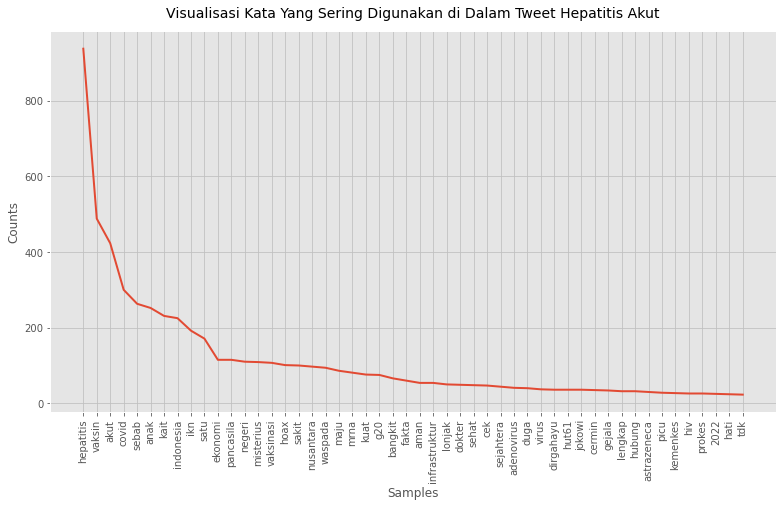

In [98]:
"""
Melihat total nilai dari kata per kata yang sering muncul berdasarkan
variabel fqdist_tweets menggunakan grafik garis (line plot) dan hanya menampilkan sebanyak 50 kata
"""
plt.figure(figsize=(13, 7))

plt.title("Visualisasi Kata Yang Sering Digunakan di Dalam Tweet Hepatitis Akut", fontsize=14, pad=14)
fqdist_tweets.plot(50, cumulative=False)
plt.show()

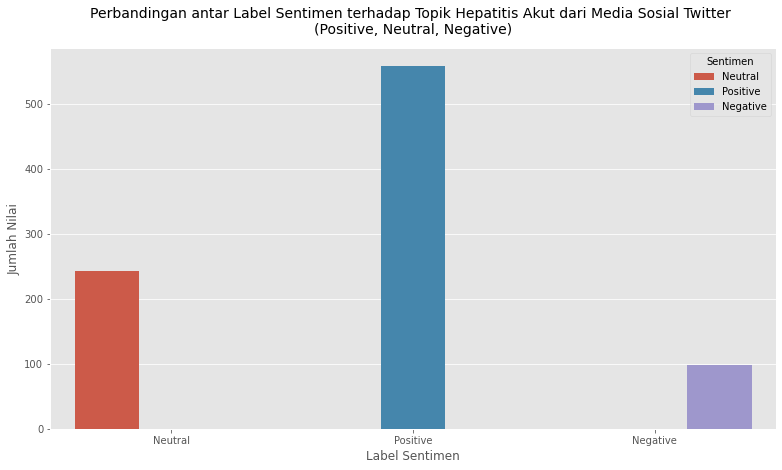

In [99]:
# Melihat perbandingan antar label sentimen yang ada di dalam DataFrame "data_hepatitis"
plt.figure(figsize=(13, 7))

sns.countplot(x="Sentimen", hue="Sentimen", data=data_hepatitis)
plt.title("Perbandingan antar Label Sentimen terhadap Topik Hepatitis Akut dari Media Sosial Twitter \n"
          "(Positive, Neutral, Negative)", fontsize=14, pad=14)
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Nilai")
plt.show()

Berda